In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
import datetime

plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
data = pd.read_csv('data/ufo_3500.csv')

In [91]:
data.iloc[0,6]
string = '\(\(NUFORC Note\)\)'
samp = data.iloc[0,5].replace(data.iloc[0,6], '')
samp.strip(NUFORC Note)

"Light seen over mountain's east of Camp McGregor.  It hovered in one spot.  It looked like a helicopter light at first.  But it was way to bright.  Then it went to a higher height.  Stayed there for a while.  Then disappeared.   ((NUFORC Note:  PD"

In [82]:
data.iloc[0,5].strip(str(data.iloc[0,6]))

"Light seen over mountain's east of Camp McGregor.  It hovered in one spot.  It looked like a helicopter light at first.  But it was way to bright.  Then it went to a higher height.  Stayed there for a while.  Then disappeared.   ((NUFORC Note:  Report appears to us to be consistent with the sighting of Venus.  PD))"

## Do some inital EDA on the pandas dataframe
columns: Date, Time, Location, Shape, Duration, Observation Text, Note Text

In [36]:
time = ['2016-10-08 07:34:13', '2015-11-15 06:12:48',
               '2015-01-24 10:11:04', '2015-03-26 16:23:53',
               '2017-04-01 00:38:21', '2015-05-15 03:47:54',
               '2015-06-24 07:32:32']
times = pd.to_datetime(time)

DatetimeIndex(['2016-10-08 07:34:13', '2015-11-15 06:12:48',
               '2015-01-24 10:11:04', '2015-03-26 16:23:53',
               '2017-04-01 00:38:21', '2015-05-15 03:47:54',
               '2015-06-24 07:32:32'],
              dtype='datetime64[ns]', freq=None)

In [55]:
# Create some mockdata for now
dates = ['1', '2', '3', '1', '4', '5', '2']
times = pd.to_datetime(time)
locations = ['canada', 'washington', 'ohio', 'united states', 'california', 'florida', 'ohio']
shape = ['disk', 'circle', 'light', 'circle', 'cylinder', 'unspecified', 'disk']
duration = [10, 15, 20, 10, 5, 5, 12]
text = ['laskdjflksjdf;', 'alkdsjfljlkjdf', 'wodlkjflsakdj', 'alskjfkdsaf', 'a;lskdjflkj', 'asdf', 'asdasdf']
note_text = ['laskdjfljdf;', 'alkdsjflkjdf', 'lkjflsakdj', 'jfkdsaf', 'akdjflkj', 'asf', 'sdasdf']

df = pd.DataFrame({'dates': dates, 'times': times, 'locations': locations, 'shape': shape, 'duration': duration,
                  'text': text, 'note_text': note_text})


In [56]:
df
df['only_dates'] = df['times'].dt.normalize()
df['only_times'] = df['times'].dt.time

In [57]:
df

,dates,times,locations,shape,duration,text,note_text,only_dates,only_times
0,1,2016-10-08 07:34:13,canada,disk,10,laskdjflksjdf;,laskdjfljdf;,2016-10-08,07:34:13
1,2,2015-11-15 06:12:48,washington,circle,15,alkdsjfljlkjdf,alkdsjflkjdf,2015-11-15,06:12:48
2,3,2015-01-24 10:11:04,ohio,light,20,wodlkjflsakdj,lkjflsakdj,2015-01-24,10:11:04
3,1,2015-03-26 16:23:53,united states,circle,10,alskjfkdsaf,jfkdsaf,2015-03-26,16:23:53
4,4,2017-04-01 00:38:21,california,cylinder,5,a;lskdjflkj,akdjflkj,2017-04-01,00:38:21
5,5,2015-05-15 03:47:54,florida,unspecified,5,asdf,asf,2015-05-15,03:47:54
6,2,2015-06-24 07:32:32,ohio,disk,12,asdasdf,sdasdf,2015-06-24,07:32:32


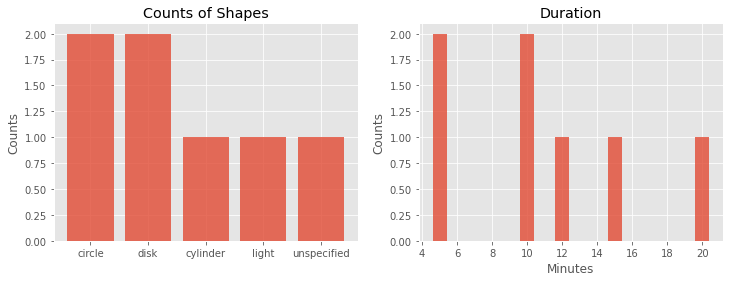

In [59]:
# Lets look at shapes and durations
shape_counts = df['shape'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]              labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
         
ax.bar(shape_counts.index, height=shape_counts.values, alpha=0.8)
ax.set_title("Counts of Shapes")
ax.set_ylabel("Counts")

ax = axes[1]
duration_counts = df['duration'].value_counts()
ax.bar(duration_counts.index, height=duration_counts.values, alpha=0.8)
ax.set_title("Duration")
ax.set_ylabel("Counts")
ax.set_xlabel("Minutes")

plt.savefig('images/shape_duration.png', bbox_inches='tight')

In [60]:
df['only_times'].values

array([datetime.time(7, 34, 13), datetime.time(6, 12, 48),
       datetime.time(10, 11, 4), datetime.time(16, 23, 53),
       datetime.time(0, 38, 21), datetime.time(3, 47, 54),
       datetime.time(7, 32, 32)], dtype=object)

In [64]:
early_morning = df[df['only_times'] < datetime.time(5, 0,0)]
morning = df[(df['only_times'] > datetime.time(5,0,0)) & (df['only_times'] < datetime.time(12,0,0))]
afternoon = df[(df['only_times'] > datetime.time(12,0,0)) & (df['only_times'] < datetime.time(5,0,0))]
evening = df[(df['only_times'] > datetime.time(5,0,0)) & (df['only_times'] < datetime.time(23,59,59))]

In [66]:
early_morning.shape[0]

2

In [68]:
def find_times(df):
    early_morning = df[df['only_times'] < datetime.time(5, 0,0)]
    morning = df[(df['only_times'] > datetime.time(5,0,0)) & (df['only_times'] < datetime.time(12,0,0))]
    afternoon = df[(df['only_times'] > datetime.time(12,0,0)) & (df['only_times'] < datetime.time(5,0,0))]
    evening = df[(df['only_times'] > datetime.time(5,0,0)) & (df['only_times'] < datetime.time(23,59,59))]
    
    n_earlymorning = early_morning.shape[0]
    n_morning = morning.shape[0]
    n_afternoon = afternoon.shape[0]
    n_evening = evening.shape[0]
    
    return [n_earlymorning, n_morning, n_afternoon, n_evening]

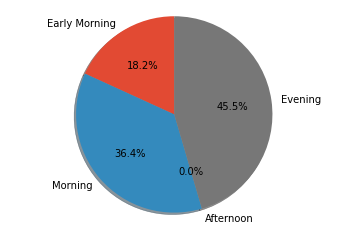

In [73]:
# Make pie-chart of times
labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening']
sizes = find_times(df)
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('images/time_of_day.png')
